In [4]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Построить точечный график
Рассчитать коэффициенты корреляции Пирсона и Спирмена
Построить модель линейной регрессии
Рассчитать коэффициент детерминации
Вывести график остатков

In [15]:
df = pd.read_csv('water.csv',sep=',')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


In [17]:
df.drop(columns=['Unnamed: 0'], inplace=True)

## Корреляция

In [18]:
df

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
...,...,...,...,...
56,South,Walsall,1527,60
57,South,West Bromwich,1627,53
58,South,West Ham,1486,122
59,South,Wolverhampton,1485,81


<AxesSubplot:xlabel='mortality', ylabel='hardness'>

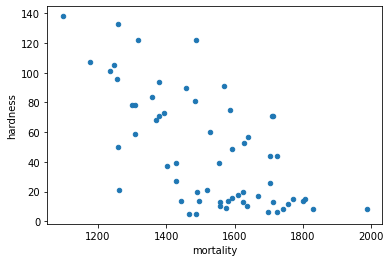

In [19]:
# визуализируем взаимосвязь жесткостью воды и смертностью
df.plot(kind='scatter', x='mortality', y='hardness')

In [21]:
# считаем коэф. корреляции Пирсона
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [22]:
# считаем коэф. корреляции Спирмана
df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [23]:
# можем посчитать коэффициенты корреляции между всеми показателями
df.corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


## Регрессия

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [26]:
X = df['hardness']
y = df['mortality']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [28]:
X_train.shape

(42,)

In [29]:
X_test.shape

(19,)

In [30]:
y_train.shape

(42,)

In [35]:
X=df[['hardness']]
y=df['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=1)
model = LinearRegression()
model.fit(X_train, y_train)

print(model.coef_)
print(model.intercept_)
y_pred = model.predict(X_test)
print(y_pred)

[-3.97593936]
1704.0481397873339
[1680.19250364 1652.36092813 1684.168443   1405.85268793 1652.36092813
 1640.43311006 1175.24820517 1680.19250364 1302.47826462 1346.21359756
 1342.2376582  1652.36092813 1648.38498877 1648.38498877 1556.93838354
 1381.99705178 1330.30984013 1413.80456665 1421.75644537 1620.55341327
 1469.46771766 1493.32335381 1548.98650482 1477.41959638 1421.75644537]


In [36]:
model.intercept_

1704.0481397873339

In [37]:
model.coef_

array([-3.97593936])

In [ ]:
# y = -3.97 * x + 1704.04

In [38]:
y_pred = model.predict(X_test)
y_pred

array([1680.19250364, 1652.36092813, 1684.168443  , 1405.85268793,
       1652.36092813, 1640.43311006, 1175.24820517, 1680.19250364,
       1302.47826462, 1346.21359756, 1342.2376582 , 1652.36092813,
       1648.38498877, 1648.38498877, 1556.93838354, 1381.99705178,
       1330.30984013, 1413.80456665, 1421.75644537, 1620.55341327,
       1469.46771766, 1493.32335381, 1548.98650482, 1477.41959638,
       1421.75644537])

In [39]:
y_test

40    1696
42    1711
2     1466
49    1587
51    1557
26    1591
34    1259
36    1724
41    1236
39    1456
24    1569
54    1625
46    1495
3     1800
27    1402
59    1485
21    1379
10    1392
53    1709
19    1260
33    1309
57    1627
17    1428
52    1640
50    1713
Name: mortality, dtype: int64

In [40]:
# коэффициент детерминации 
model.score(X_test, y_test)

-0.0011231211588249579

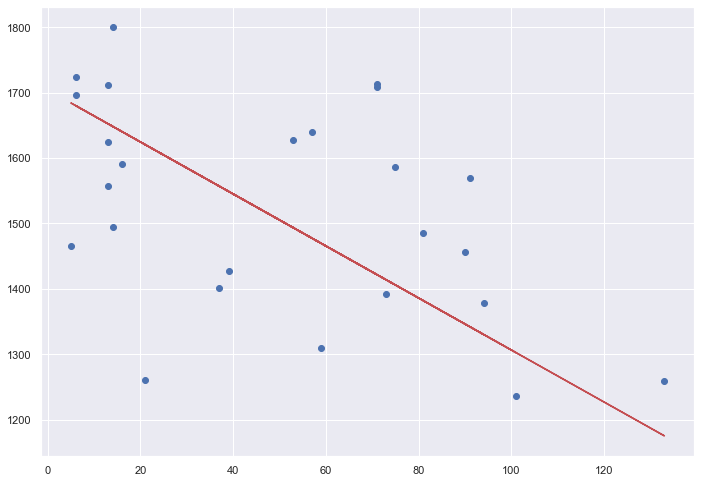

In [41]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [44]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [46]:
X_const = sm.add_constant(X_train) # техническая особенность библиотеки, надо руками добавить константу

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [48]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Sun, 22 Jan 2023   Prob (F-statistic):           7.83e-06
Time:                        01:45:51   Log-Likelihood:                -269.10
No. Observations:                  42   AIC:                             542.2
Df Residuals:                      40   BIC:                             545.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1668.9723     36.543     45.671      0.0

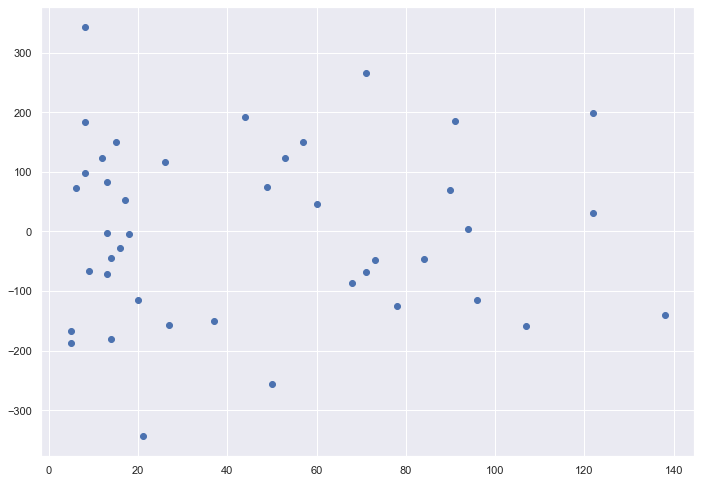

In [49]:
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([1., 0., 1., 0., 2., 5., 3., 2., 5., 3., 2., 2., 5., 3., 2., 4., 0.,
        1., 0., 1.]),
 array([-3.43207209e+02, -3.08892795e+02, -2.74578382e+02, -2.40263968e+02,
        -2.05949554e+02, -1.71635140e+02, -1.37320726e+02, -1.03006312e+02,
        -6.86918979e+01, -3.43774840e+01, -6.30700817e-02,  3.42513439e+01,
         6.85657578e+01,  1.02880172e+02,  1.37194586e+02,  1.71509000e+02,
         2.05823414e+02,  2.40137827e+02,  2.74452241e+02,  3.08766655e+02,
         3.43081069e+02]),
 <BarContainer object of 20 artists>)

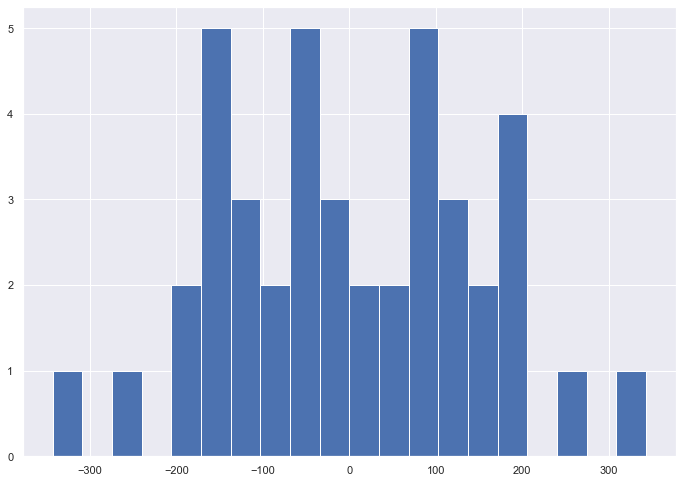

In [50]:
plt.hist(results.resid, bins=20)

In [52]:
#2
df_north = df
df_south = df
df_north = df_north[df_north['location'] == 'North']
df_south = df_south[df_south['location'] == 'South']
X=df_north[['hardness']]
y=df_north['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=1)
model = LinearRegression()
model.fit(X_train, y_train)

print(model.coef_)
print(model.intercept_)
y_pred = model.predict(X_test)
print(y_pred)

[-3.44997348]
1710.1682911772123
[1396.22070447 1558.36945804 1675.66855637 1465.22017407 1641.16882157
 1451.42028015 1689.4684503  1661.86866245 1682.56850333 1465.22017407
 1682.56850333 1661.86866245 1658.41868897 1648.06876853]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

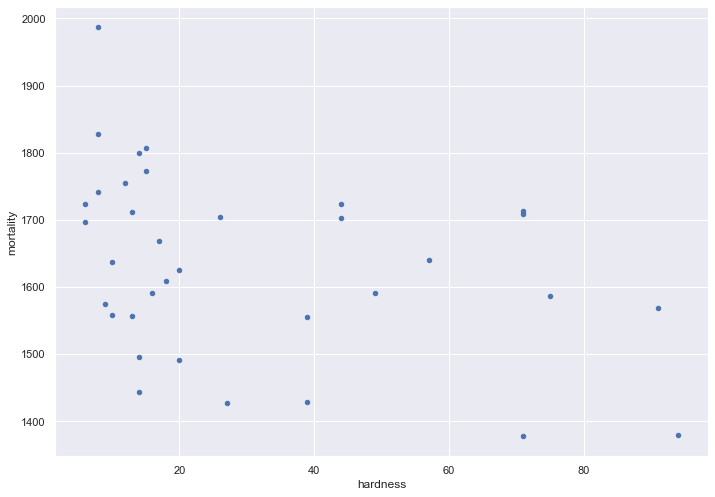

In [53]:
df_north.plot(kind='scatter', x='hardness', y='mortality')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

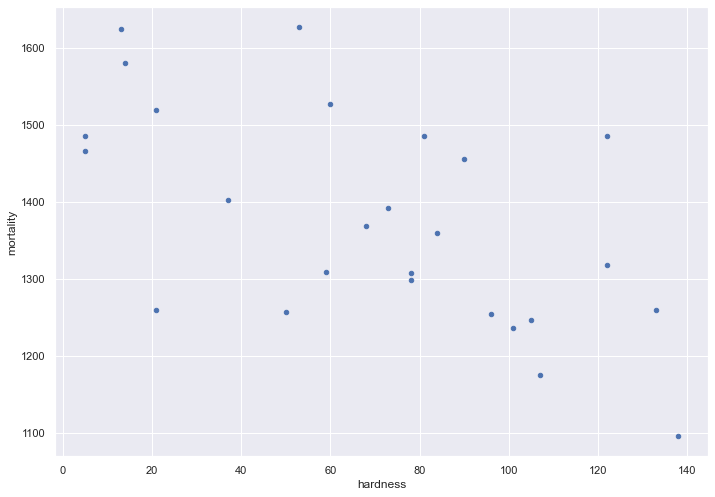

In [54]:
df_south.plot(kind='scatter', x='hardness', y='mortality')

In [55]:
df_north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [56]:
df_south[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [57]:
df_north[['hardness', 'mortality']].corr(method='spearman')


,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [58]:
df_south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


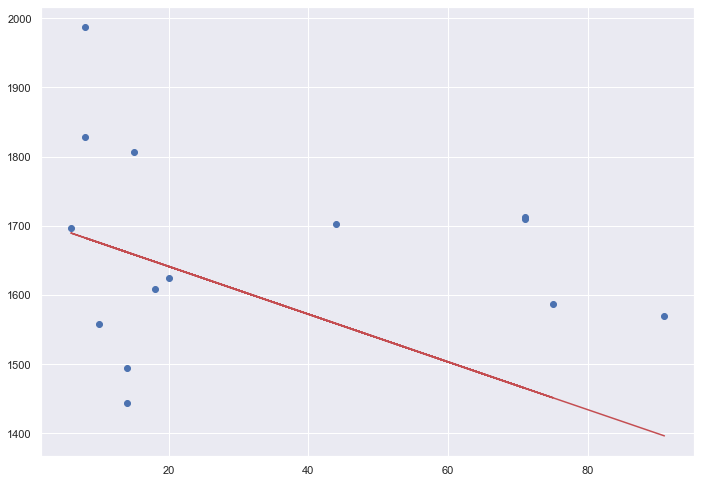

In [59]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [60]:
model.score(X_test, y_test) #плохое качество модели для северной части выборки

-0.5649934257355071

In [61]:
X=df_south[['hardness']]
y=df_south['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=1)
model = LinearRegression()
model.fit(X_train, y_train)

print(model.coef_)
print(model.intercept_)
y_pred = model.predict(X_test)
print(y_pred)

[-1.61999693]
1499.4664621990491
[1335.84677197 1403.88664315 1353.66673823 1363.38671983 1402.26664622
 1275.90688545 1389.30667076 1418.46661555 1381.20668609 1373.10670143
 1478.40650207]


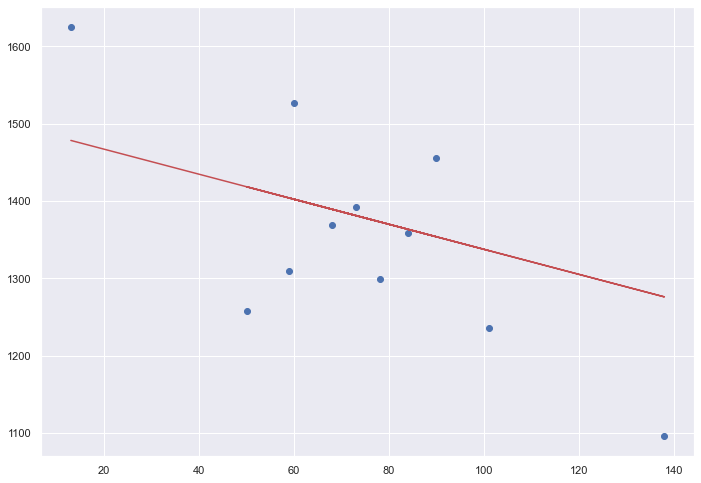

In [62]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [63]:
model.score(X_test, y_test) #плохое качество модели для южной части выборки

0.3773007047089243